In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Total Age Distribution

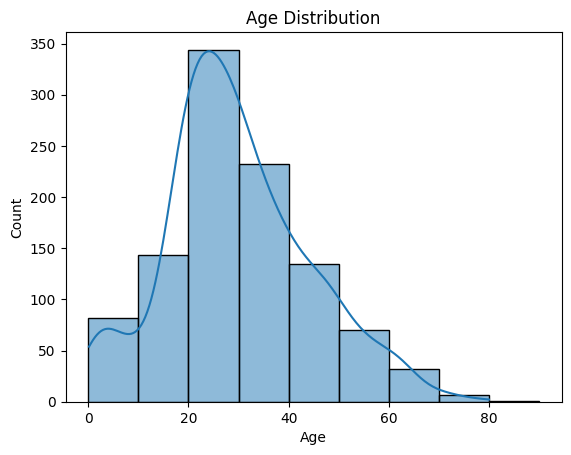

In [5]:
sns.histplot(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [6]:
df.pclass.nunique()

3

In [7]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
age_groups = pd.cut(df['age'], bins=bins, labels=labels)
precentes = age_groups.value_counts() / age_groups.count() * 100

## Age Distribution by Pclass

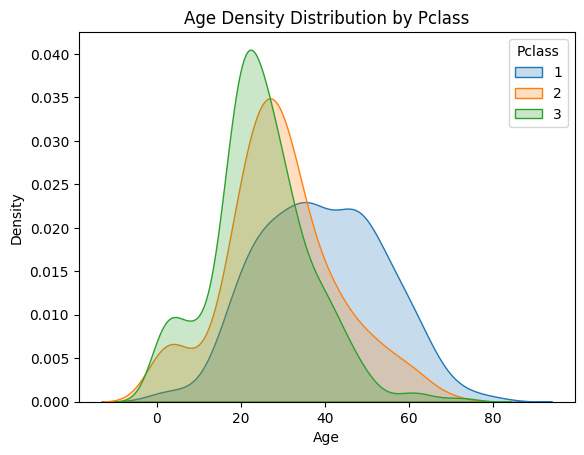

In [8]:
grouped_by_pclass = df.groupby('pclass')
for group_id, group in grouped_by_pclass:
    sns.kdeplot(group['age'], label=f'{group_id}', fill=True)
plt.title('Age Density Distribution by Pclass')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Pclass')
plt.show()

In [9]:
df["last_name"] = df["name"].apply(lambda x: x.split(",")[0])

In [10]:
df["age_groups"] = age_groups
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,last_name,age_groups
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,20-29
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,0-9
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,0-9
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,20-29
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,20-29


## Survival vs Age

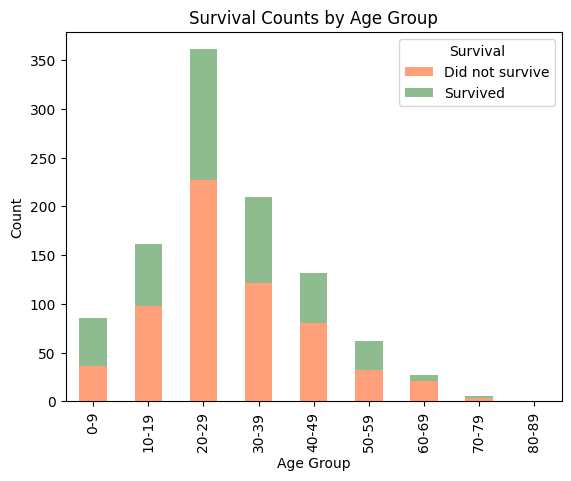

In [11]:
grouped_by_age_groups = df.groupby('age_groups')
survived_counts = grouped_by_age_groups['survived'].value_counts().unstack().fillna(0)
survived_counts.plot(kind='bar', stacked=True, color=['lightsalmon', 'darkseagreen'])
plt.title('Survival Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], title='Survival')
plt.show()

## Survival vs Pclass

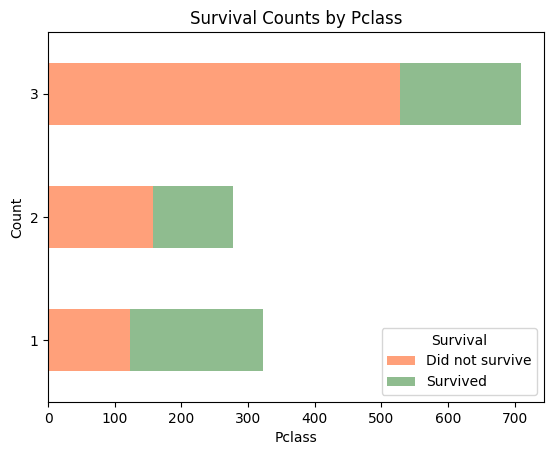

In [17]:
survived_counts = grouped_by_pclass['survived'].value_counts().unstack().fillna(0)
survived_counts.plot(kind='barh', stacked=True, color=['lightsalmon', 'darkseagreen'])
plt.title('Survival Counts by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count') 
plt.legend(['Did not survive', 'Survived'], title='Survival')
plt.show()